In [7]:
import numpy as np
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns

In [9]:
df_csv = pd.read_csv("01-imdb_top_1000.csv" )
df_csv.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [10]:
votos = df_csv['No_of_Votes']
meta = df_csv['Meta_score']
imdb = df_csv['IMDB_Rating']

# Pair Programming Estadística II

 Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando ayer y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos

Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

Se ruega a la hora de realizar la entrega que incluyáis el conjunto de datos que hayáis decidido emplear para estos ejercicios.

### Objetivos

Los objetivos de hoy son:

Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

In [11]:
# Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
media = np.mean(votos)
print (f'La media es {media}')

La media es 273692.911


In [12]:
moda, frecuencia = stats.mode(votos)
print (f'La moda y la frecuencia son {moda, frecuencia}')
    # mediana 
print(f'La mediana es {np.median(votos)}') # mediana para todos los datos
print(f'La mediana para la columna es{np.median(votos, 0)}') # mediana de cada columna
# salen iguales porque lo estamos haciendo sobre una columna todo

La moda y la frecuencia son (array([65341], dtype=int64), array([2]))
La mediana es 138548.5
La mediana para la columna es138548.5


C:\Users\kuska\AppData\Local\Temp\ipykernel_71172\249550497.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda, frecuencia = stats.mode(votos)


In [13]:
# maximo  y minimo
maximo = np.max(votos)
minimo = np.min(votos)
print (f'El maximo es {maximo}')
print (f'El minimo es {minimo}')


El maximo es 2343110
El minimo es 25088


In [14]:
# Percentiles 25, 75
percentil25 = np.percentile(votos, 25, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
print('El percentil 25 es:', {percentil25})

El percentil 25 es: {55526.25}


C:\Users\kuska\AppData\Local\Temp\ipykernel_71172\4067786550.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  percentil25 = np.percentile(votos, 25, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)


In [15]:
percentil75 = np.percentile(votos, 75, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
print('El percentil 75 es:', {percentil75})

El percentil 75 es: {374161.25}


C:\Users\kuska\AppData\Local\Temp\ipykernel_71172\221618866.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  percentil75 = np.percentile(votos, 75, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)


In [16]:
# Rango Intercualtílico

# Calculamos los percentiles 75 y 25 (que serían el tercer y primer cuartil)
q3, q1 = np.percentile(votos, [75, 25])

# Calculamos el rango intercuartílico como la resta de los valores del tercer y primer cuartil
riq = q3 - q1
print("El rango intercuartílico es:", riq)

El rango intercuartílico es: 318635.0


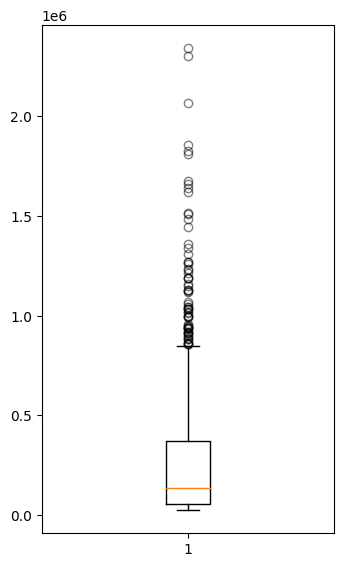

In [17]:
# Boxplot de algunas variables
# Creando el objeto figura con matplotlib
fig = plt.figure(1, figsize=(40, 70))
# Creando el subgrafico al que añadiremos el grafico de cajas
ax = fig.add_subplot(999)
# Creando el grafico de cajas
bp = ax.boxplot(votos)
# Visualizar mas facilmente los datos atípicos# En 'fliers' se guardan aquellos datos que se encuentran más aislados de los demás (outliers)
for flier in bp['fliers']:
    flier.set(marker='o', color='pink', alpha=0.5) # Los dibujamos con un marcador especial

# Tabla de frecuencias

In [18]:

# Variables cualitativas

# Primero agrupamos e
peliculas = df_csv.groupby("Certificate") # Devolvera un objeto DataFrameGroupBy
print(peliculas)

# Aplicamos el método agg para agregar los datos por la columa species
frecuencias_certificado = peliculas.agg(frecuencia=("Certificate","count"))
    
    # Imprimimos por pantalla el resultado de la agrupación y agregación
frecuencias_certificado

,frecuencia
Certificate,
16,1
A,197
Approved,11
G,12
GP,2
PG,37
PG-13,43
Passed,34
R,146


In [19]:
# Variables cuantitativas
ratio_imdb = df_csv.groupby("IMDB_Rating")
frecuencia_imdb =  ratio_imdb.agg(frecuencia=("IMDB_Rating", "count"))
frecuencia_imdb

,frecuencia
IMDB_Rating,
7.6,123
7.7,157
7.8,151
7.9,106
8.0,141
8.1,127
8.2,67
8.3,44
8.4,31


In [29]:
# Frecuencia acumulada

df_csv["frecuencia_imdb"] = pd.cut(df_csv["IMDB_Rating"], bins=10)
frecuencia_grop = df_csv.groupby("frecuencia_imdb")
frecuencia_coun =  frecuencia_grop.agg(frecuencia=("IMDB_Rating", "count"))
    # Calculamos una nueva columna del DataFrame llamada frecuencia acumulada usando cumsum() sobre la frecuencia
frecuencia_coun["frecuencia_acumulada"] = frecuencia_coun["frecuencia"].cumsum()
    # Visualizamos el DataFrame resultado
frecuencia_coun


,frecuencia,frecuencia_acumulada
frecuencia_imdb,,
"(7.598, 7.77]",280,280
"(7.77, 7.94]",257,537
"(7.94, 8.11]",268,805
"(8.11, 8.28]",67,872
"(8.28, 8.45]",75,947
"(8.45, 8.62]",35,982
"(8.62, 8.79]",5,987
"(8.79, 8.96]",8,995
"(8.96, 9.13]",3,998


In [23]:
ratio_meta = df_csv.groupby("Meta_score")
frecuencia_meta =  ratio_meta.agg(frecuencia=("Meta_score", "count"))
frecuencia_meta

,frecuencia
Meta_score,
28.0,1
30.0,1
33.0,1
36.0,1
40.0,1
...,...
96.0,18
97.0,12
98.0,9


In [30]:
# Frecuencia acumulada

df_csv["frecuencia_meta"] = pd.cut(df_csv["Meta_score"], bins=10)
frecuencia_gropy = df_csv.groupby("frecuencia_meta")
frecuencia_county =  frecuencia_gropy.agg(frecuencia=("Meta_score", "count"))
    # Calculamos una nueva columna del DataFrame llamada frecuencia acumulada usando cumsum() sobre la frecuencia
frecuencia_coun["frecuencia_acumulada"] = frecuencia_county["frecuencia"].cumsum()
    # Visualizamos el DataFrame resultado
frecuencia_county

,frecuencia
frecuencia_meta,
"(27.928, 35.2]",3
"(35.2, 42.4]",3
"(42.4, 49.6]",13
"(49.6, 56.8]",27
"(56.8, 64.0]",66
"(64.0, 71.2]",118
"(71.2, 78.4]",181
"(78.4, 85.6]",182
"(85.6, 92.8]",150


# Representación de al menos una tabla de frecuencias

<AxesSubplot: ylabel='Frequency'>

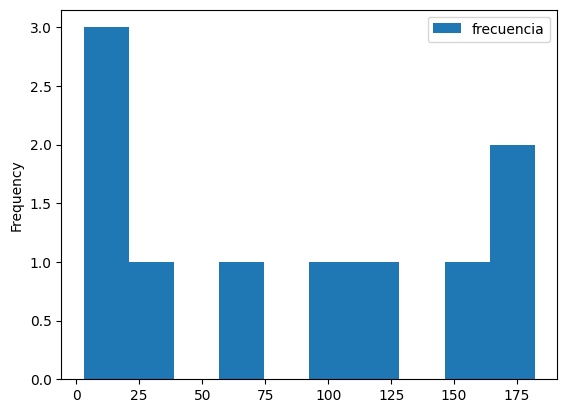

In [36]:
frecuencia_county.plot.hist()

# Resumen

In [ ]:
print(f'La media, la moda, el maximo y el minimo son {media, moda, maximo, minimo}')

# Interpretación de los resultados.

Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.